<a href="https://colab.research.google.com/github/Kishankumar1328/-DATA-ANALYSICS/blob/main/Prediction_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Heart Failure Clinical Records.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
column_name=df.columns
print(column_name)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [18]:
for i in df.columns:
  print('{}is unqiue: {}'.format(i, df[i].is_unique))

ageis unqiue: False
anaemiais unqiue: False
creatinine_phosphokinaseis unqiue: False
diabetesis unqiue: False
ejection_fractionis unqiue: False
high_blood_pressureis unqiue: False
plateletsis unqiue: False
serum_creatinineis unqiue: False
serum_sodiumis unqiue: False
sexis unqiue: False
smokingis unqiue: False
timeis unqiue: False
DEATH_EVENTis unqiue: False


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [24]:
df.DEATH_EVENT.unique()

array([1, 0])

In [25]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [27]:
df["DEATH_EVENT"].value_counts(normalize=True)
#•	67.89 % of the patients survived.
#•	32.11 % of the patients deceased.


0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

Text(0.5, 0, 'Death Event')

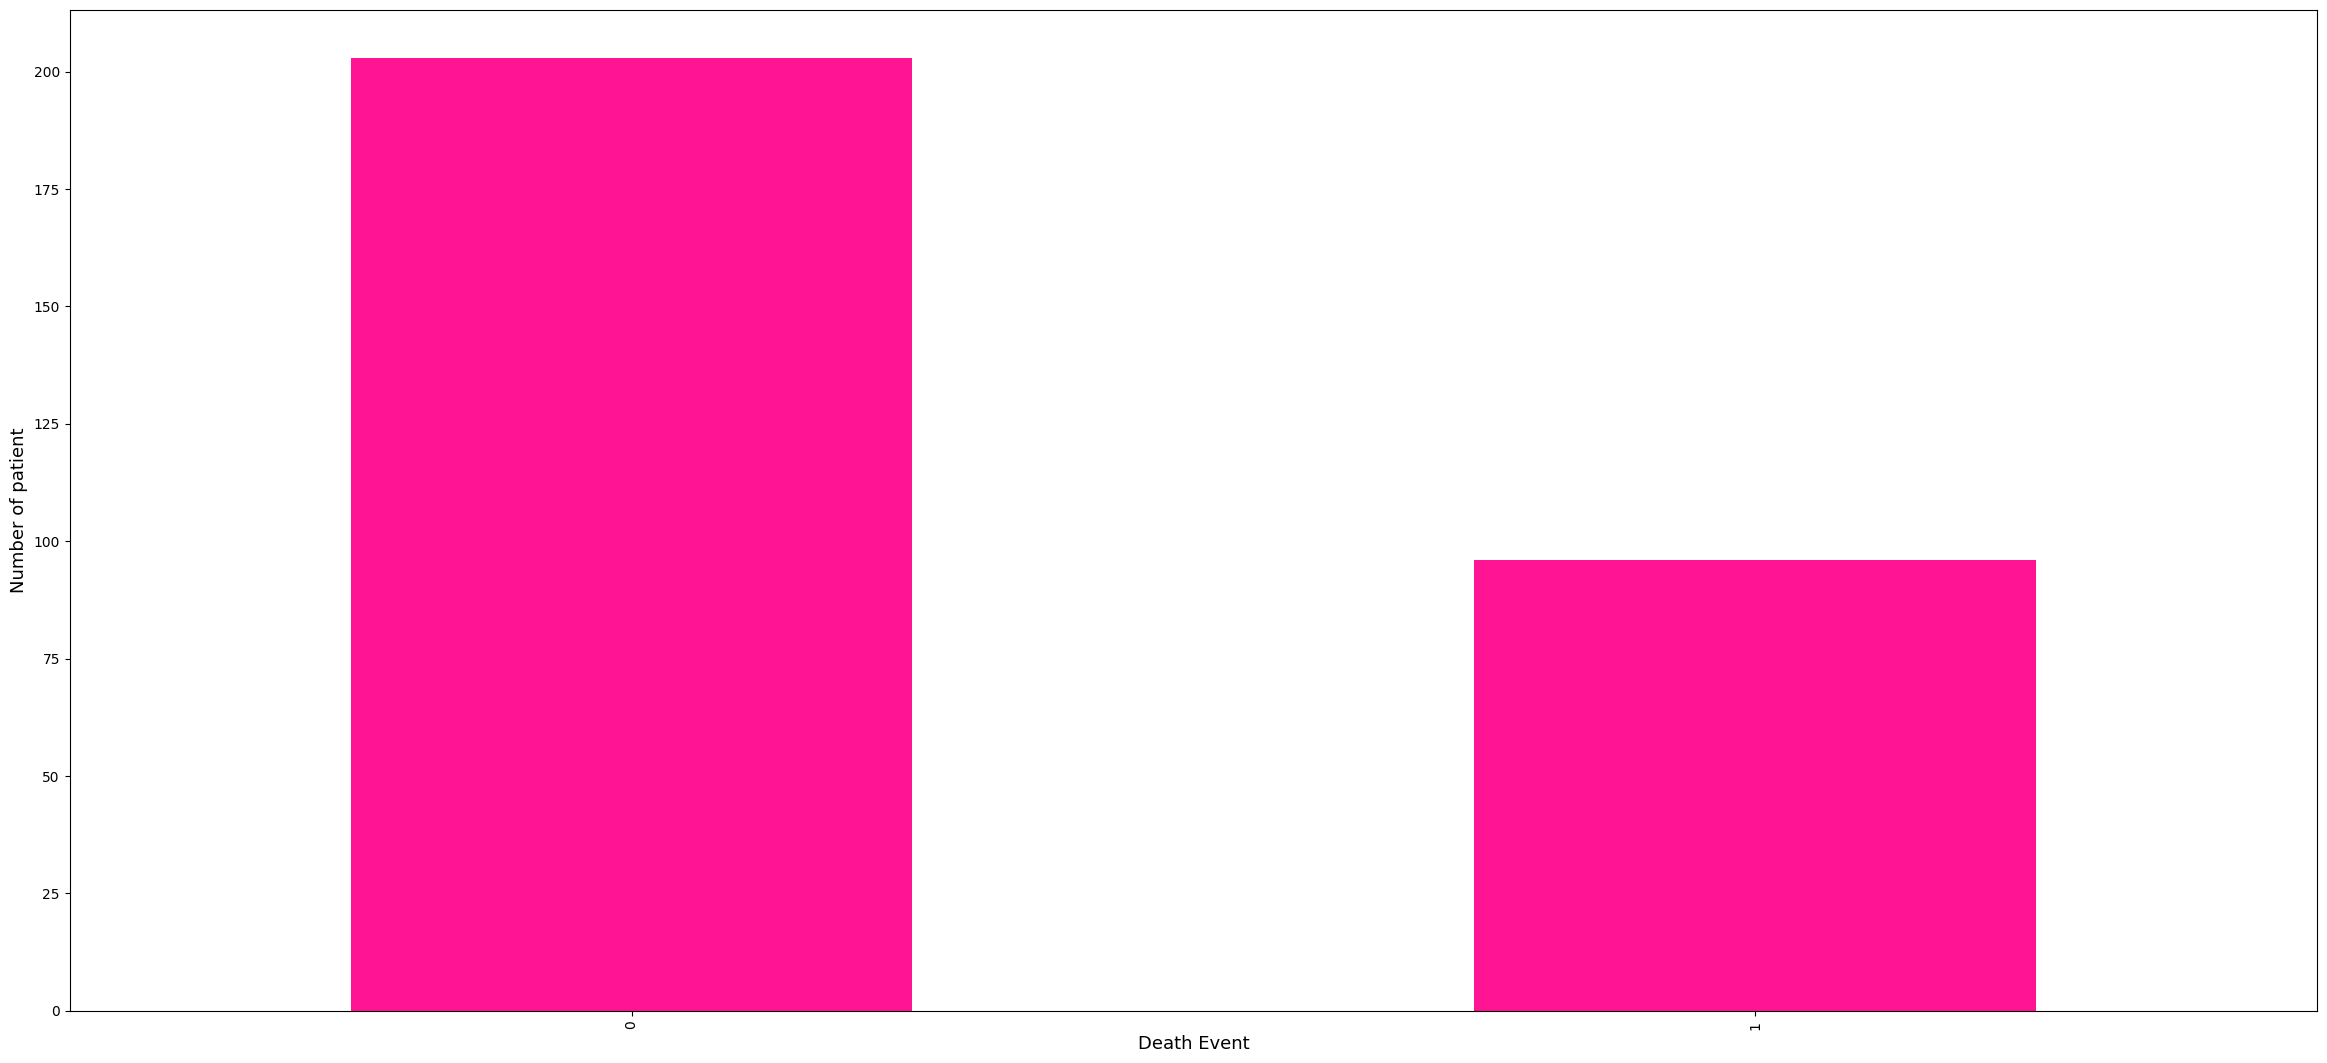

In [31]:
plt.figure(figsize=(29,13))
df["DEATH_EVENT"].value_counts().plot(kind="bar",color="deeppink")
plt.ylabel("Number of patient",fontsize=13)
plt.xlabel("Death Event",fontsize=13)

<Axes: >

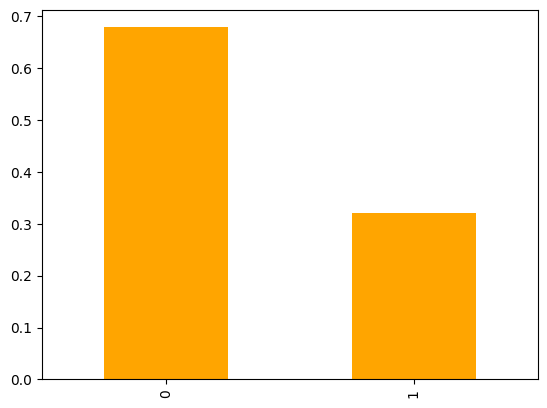

In [75]:
df["DEATH_EVENT"].value_counts(normalize=True).plot(kind="bar",color="orange",alpha=1)

Text(0, 0.5, 'patient')

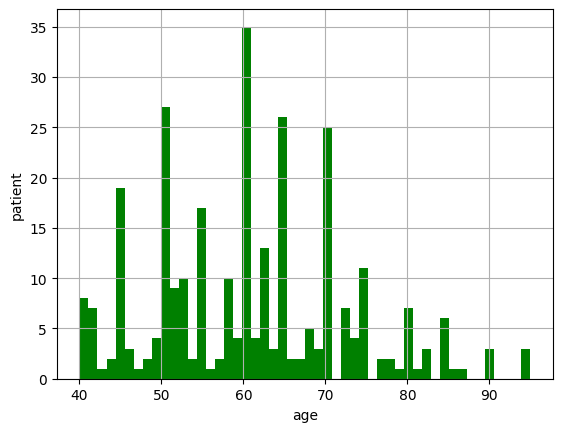

In [37]:
#a)AGE
df['age'].hist(bins=50,color="green")
plt.xlabel('age')
plt.ylabel('patient')

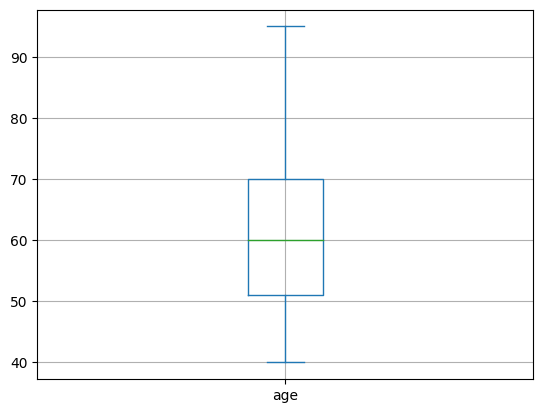

In [40]:
df["age"].plot(kind="box")
plt.grid()

In [41]:
#2B)SEX
df["sex"].value_counts()

1    194
0    105
Name: sex, dtype: int64

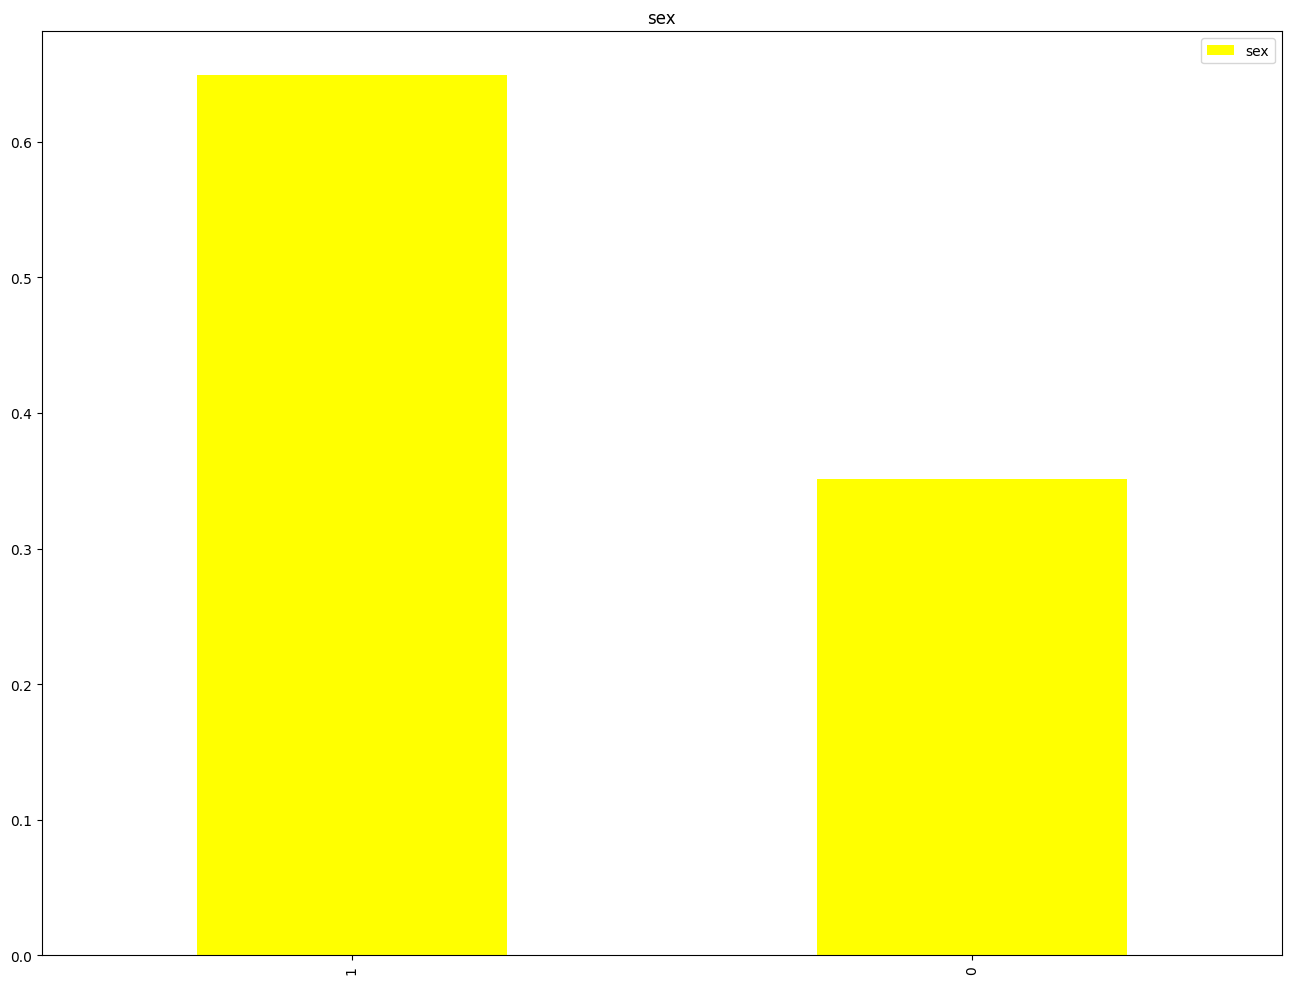

In [57]:
plt.figure(figsize=(16,12))
df["sex"].value_counts(normalize=True).plot(kind="bar",title="sex",color="yellow",alpha=1)
plt.legend()

In [47]:
df["sex"].count()#missing value

299

In [49]:
#C)Anaemia
df["anaemia"].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

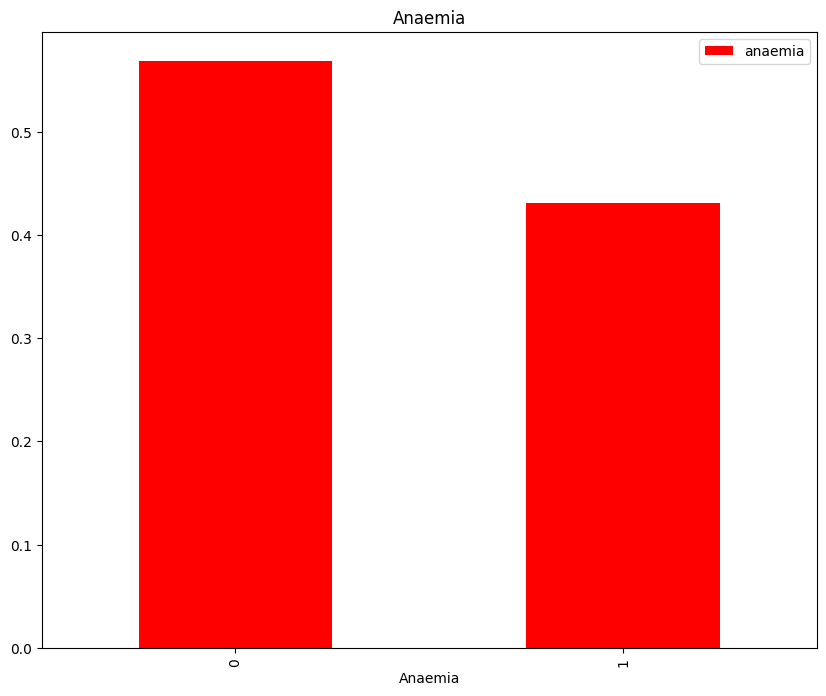

In [50]:
plt.figure(figsize=(10,8))
df["anaemia"].value_counts(normalize=True).plot(kind="bar",color="red",alpha=1,title="Anaemia")
plt.xlabel("Anaemia")
plt.legend()

In [51]:
df["anaemia"].count()

299

In [52]:
#D)High blood Pressure
df["high_blood_pressure"].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

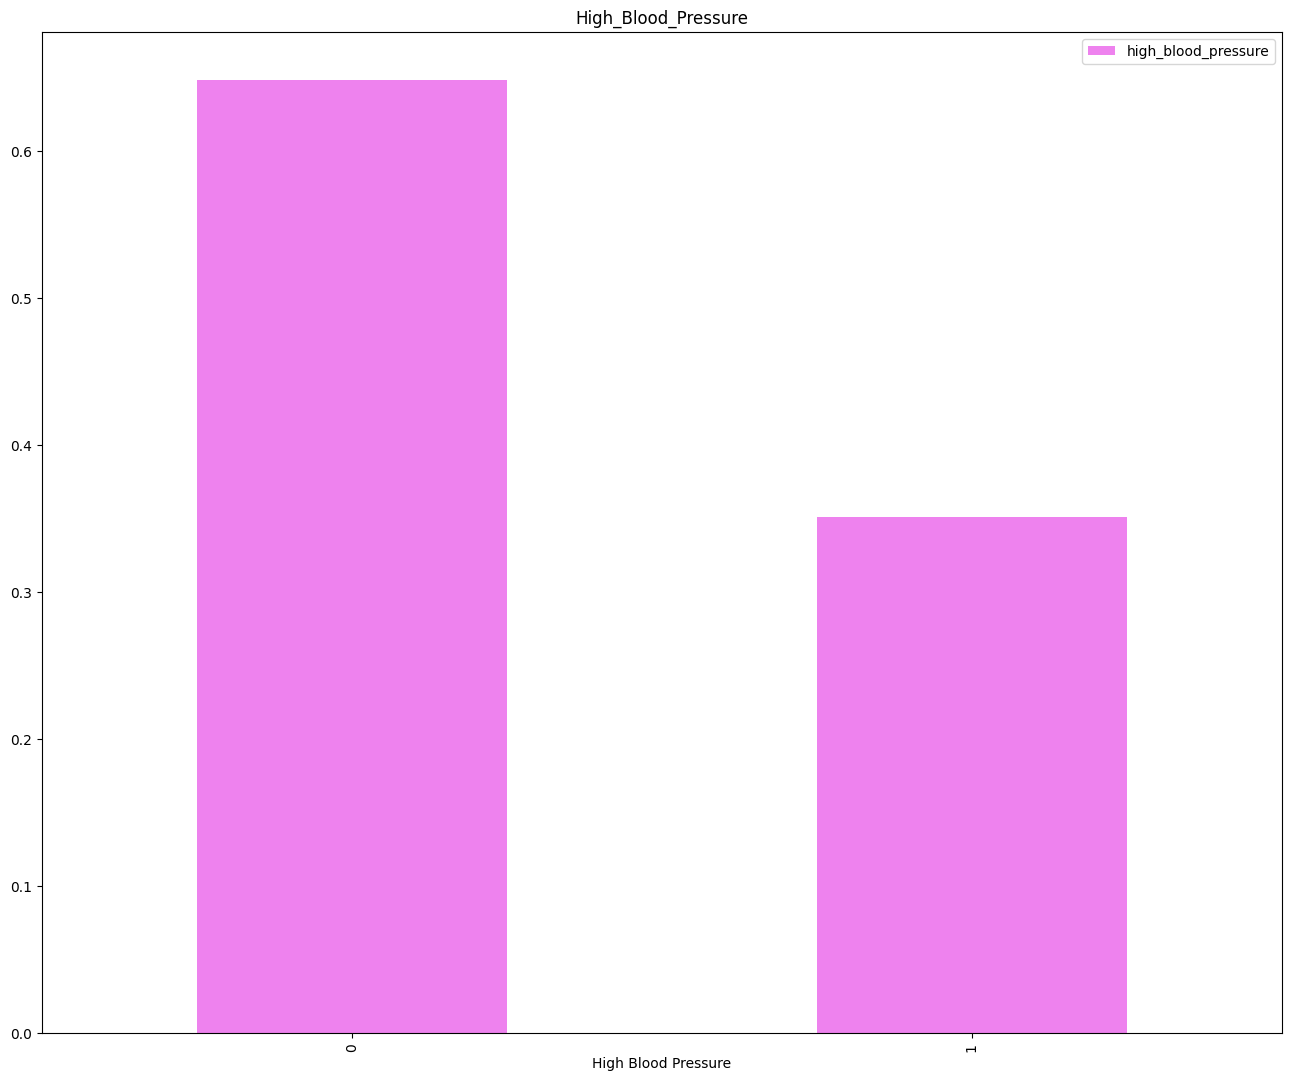

In [56]:
df["high_blood_pressure"].value_counts(normalize=True).plot(kind="bar",figsize=(16,13),title="High_Blood_Pressure",color="violet",alpha=1)
plt.xlabel("High Blood Pressure")
plt.legend()

In [58]:
#e)Diabetes
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

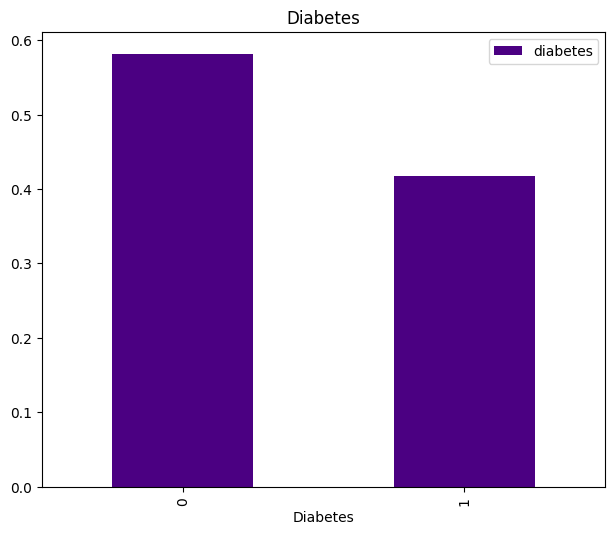

In [74]:
plt.figure(1)
plt.subplot(221)
df["diabetes"].value_counts(normalize=True).plot(kind="bar",figsize=(16,13),title="Diabetes",color="indigo",alpha=1)
plt.xlabel("Diabetes")
plt.legend()

In [63]:
df["diabetes"].count()

299

In [64]:
#f)smoking
df["smoking"].value_counts()

0    203
1     96
Name: smoking, dtype: int64

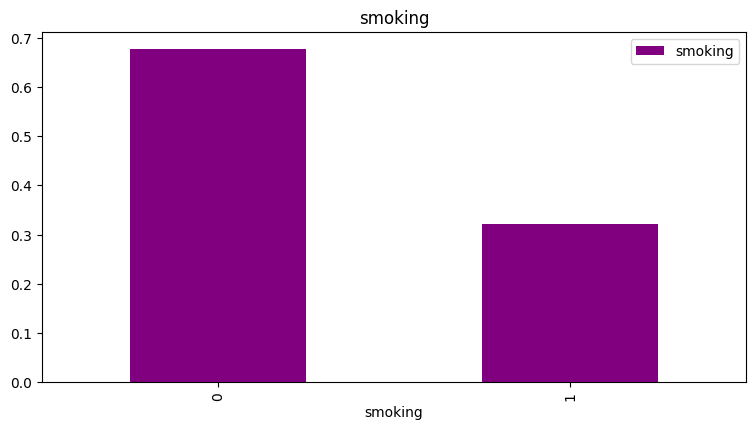

In [72]:
plt.figure(1)
plt.subplot(221)
df["smoking"].value_counts(normalize=True).plot(kind="bar",figsize=(20,10),title="smoking",color="purple",alpha=1)
plt.xlabel("smoking")
plt.legend()

In [73]:
df["smoking"].count()

299